Created by Alberto Ueda on 2017-01-30

## Methods

In [1]:
%pylab inline
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [391]:
def plot_prec_recall(df, subarea, output_dir):
    
    axes = df.plot(label='H-index', x='Recall.0@k',y='Precision.0@k', style='r-', grid=3)    
    df.plot(label='P-score', x='Recall.1@k', y='Precision.1@k', style='g-*', grid=3, ax=axes)
    df.plot(label='norm-P-score', x='Recall.2@k', y='Precision.2@k', style='b-+', grid=3, ax=axes)
    
    # Fix the wrong style at the legend
    axes.legend(loc='lower right')
    
    axes.set_ylim(0, 1.1)
    axes.set_xlim(0, 1.05)    
    axes.set_xlabel("Recall@k")    
    axes.set_title(subarea)
    
    plt.savefig(output_dir + '/' + subarea + '.eps', format='eps', dpi=1200)

In [392]:
def compute_prec_recall(rankings, vsubareas, subarea, dirname):
    
    result = rankings.merge(
        vsubareas, on='Vkey', how='left').merge(
        vsubareas, left_on='Vkey.1', right_on='Vkey', how='left').merge(
        vsubareas, left_on='Vkey.2', right_on='Vkey', how='left')
    
    result.rename(columns={'Rank':'Rank.0', 'Vkey_x':'Vkey.0', 'Subareas_x':'Subareas.0',
                                   'Subareas_y':'Subareas.1', 'Subareas':'Subareas.2'}, inplace=True)    
  
    totalrel = float(vsubareas[vsubareas['Subareas'].str.contains(subarea)].shape[0])
    
    for i in range(0, 3):
        result[subarea + str(i)] = result['Subareas.'+ str(i)].apply(lambda x: subarea in str(x))    

        foundrel = 0    

        for index, row in result.iterrows():
            if row[subarea + str(i)] == True: 
                foundrel += 1
            result.loc[index, 'Precision.' + str(i) + '@k'] = foundrel / float(index+1)
            result.loc[index, 'Recall.' + str(i) + '@k'] = foundrel / totalrel

        del result[subarea + str(i)]
    
    result = result[[
            'Rank.0','Vkey.0','Subareas.0', 'Precision.0@k', 'Recall.0@k',
            'Rank.1','Vkey.1','Subareas.1', 'Precision.1@k', 'Recall.1@k',
            'Rank.2','Vkey.2','Subareas.2', 'Precision.2@k', 'Recall.2@k',
        ]]
    
    root_dir = 'expert-subareas-classification'
    result.to_csv(root_dir + '/' + dirname + '/' + subarea + '_precision_recall.csv')
    
    plot_prec_recall(result, subarea, root_dir)
    
    return result    

In [237]:
def show_me(subarea, dirname, min_votes): 
    vs = pd.read_csv('expert-subareas-classification/' + dirname + '/venues_subareas-' + str(min_votes) + '-votes.csv')
    rankings = pd.read_csv('input/march-9-the-right-50/' + subarea + '.csv',
                             usecols = ['Rank', 'Vkey', 'Rank.1', 'Vkey.1', 'Rank.2', 'Vkey.2'])

    compute_prec_recall(rankings, vs, subarea, dirname)

## Plotting I

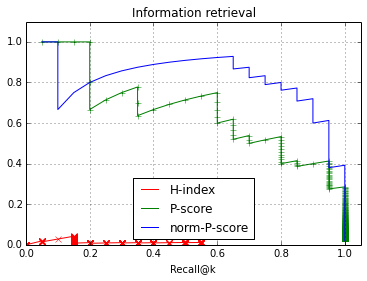

In [155]:
show_me('Information retrieval', 'ir-db-cn-berthier', 2)

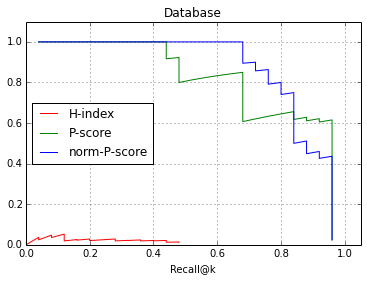

In [109]:
show_me('Database', 'ir-db-cn-berthier', 2)

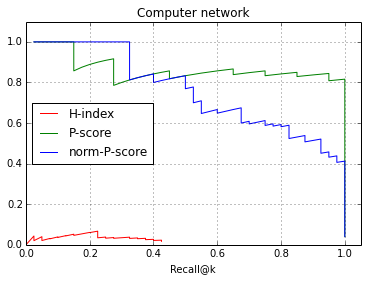

In [111]:
show_me('Computer network', 'ir-db-cn-berthier', 2)

## Plotting II

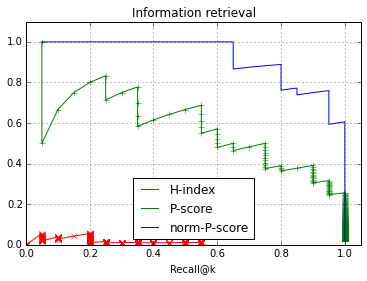

In [159]:
show_me('Information retrieval', 'ir-students', 2)

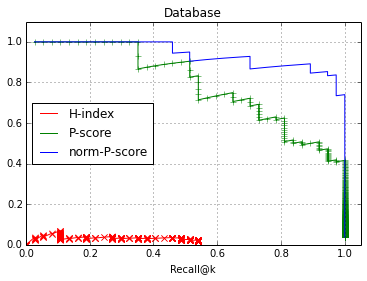

In [133]:
show_me('Database', 'db', 1)

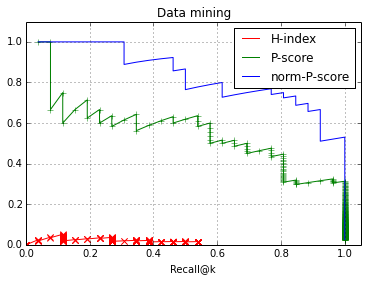

In [138]:
show_me('Data mining', 'dm', 2)

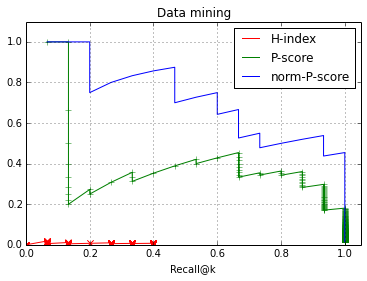

In [141]:
show_me('Data mining', 'dm', 3)

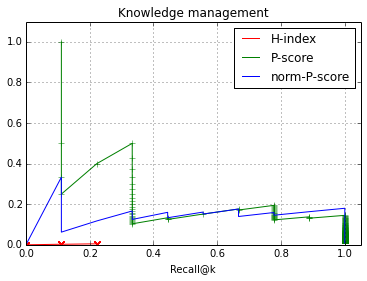

In [144]:
show_me('Knowledge management', 'km', 2)

## Plotting III

In [149]:
pd.read_csv('expert-subareas-classification/ir-db-cn-berthier/Information retrieval_precision_recall.csv')

,Unnamed: 0,Rank.0,Vkey.0,Subareas.0,Precision.0@k,Recall.0@k,Rank.1,Vkey.1,Subareas.1,Precision.1@k,Recall.1@k,Rank.2,Vkey.2,Subareas.2,Precision.2@k,Recall.2@k
0,0,1,journals/nar,NaN,0.000000,0.00,1,conf/sigir,['Information retrieval'],1.000000,0.05,1,conf/ictir,['Information retrieval'],1.000000,0.05
1,1,2,conf/balt,NaN,0.000000,0.00,2,conf/cikm,"['Database', 'Information retrieval', 'Knowled...",1.000000,0.10,2,conf/sigir,['Information retrieval'],1.000000,0.10
2,2,3,journals/cce,NaN,0.000000,0.00,3,conf/trec,['Information retrieval'],1.000000,0.15,3,conf/adcs,NaN,0.666667,0.10
3,3,4,conf/cvpr,"['Computer vision', 'Pattern recognition']",0.000000,0.00,4,conf/ecir,['Information retrieval'],1.000000,0.20,4,journals/ir,['Information retrieval'],0.750000,0.15
4,4,5,journals/pr,NaN,0.000000,0.00,5,conf/clef,[''],0.800000,0.20,5,conf/ecir,['Information retrieval'],0.800000,0.20
5,5,6,journals/cee,NaN,0.000000,0.00,6,conf/www,['World Wide Web'],0.666667,0.20,6,conf/trec,['Information retrieval'],0.833333,0.25
6,6,7,journals/cma,NaN,0.000000,0.00,7,journals/jasis,['Information retrieval'],0.714286,0.25,7,journals/sigir,['Information retrieval'],0.857143,0.30
7,7,8,journals/neuroimage,NaN,0.000000,0.00,8,journals/ipm,['Information retrieval'],0.750000,0.30,8,conf/iiix,"['Human-computer interaction', 'Information re...",0.875000,0.35
8,8,9,conf/mmar,NaN,0.000000,0.00,9,journals/sigir,['Information retrieval'],0.777778,0.35,9,journals/tois,['Information retrieval'],0.888889,0.40
9,9,10,conf/icete,NaN,0.000000,0.00,10,conf/mm,['Multimedia'],0.700000,0.35,10,conf/wsdm,"['Data mining', 'Information retrieval']",0.900000,0.45


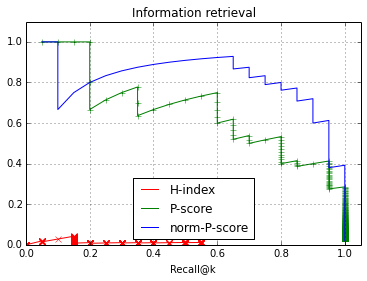

In [162]:
show_me('Information retrieval', 'ir-db-cn-berthier', 2)

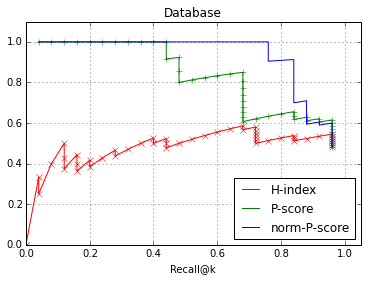

In [171]:
show_me('Database', 'ir-db-cn-berthier', 2)

In [169]:
# TODO A few differences between the ones sent and the ones we get here 
pd.read_csv('expert-subareas-classification/ir-db-cn-berthier/Information retrieval_precision_recall.csv')

,Unnamed: 0,Rank.0,Vkey.0,Subareas.0,Precision.0@k,Recall.0@k,Rank.1,Vkey.1,Subareas.1,Precision.1@k,Recall.1@k,Rank.2,Vkey.2,Subareas.2,Precision.2@k,Recall.2@k
0,0,1,conf/cvpr,"['Computer vision', 'Pattern recognition']",0.000000,0.00,1,conf/sigir,['Information retrieval'],1.000000,0.05,1,conf/ictir,['Information retrieval'],1.000000,0.05
1,1,2,conf/www,['World Wide Web'],0.000000,0.00,2,conf/cikm,"['Database', 'Information retrieval', 'Knowled...",1.000000,0.10,2,conf/sigir,['Information retrieval'],1.000000,0.10
2,2,3,conf/icml,['Machine learning'],0.000000,0.00,3,conf/trec,['Information retrieval'],1.000000,0.15,3,journals/ir,['Information retrieval'],1.000000,0.15
3,3,4,conf/nips,['Machine learning'],0.000000,0.00,4,conf/ecir,['Information retrieval'],1.000000,0.20,4,conf/ecir,['Information retrieval'],1.000000,0.20
4,4,5,conf/sigmod,['Database'],0.000000,0.00,5,conf/clef,[''],0.800000,0.20,5,conf/trec,['Information retrieval'],1.000000,0.25
5,5,6,conf/wsdm,"['Data mining', 'Information retrieval']",0.166667,0.05,6,conf/www,['World Wide Web'],0.666667,0.20,6,journals/sigir,['Information retrieval'],1.000000,0.30
6,6,7,conf/emnlp,['Natural language processing'],0.142857,0.05,7,journals/jasis,['Information retrieval'],0.714286,0.25,7,conf/iiix,"['Human-computer interaction', 'Information re...",1.000000,0.35
7,7,8,conf/icde,['Database'],0.125000,0.05,8,journals/ipm,['Information retrieval'],0.750000,0.30,8,journals/tois,['Information retrieval'],1.000000,0.40
8,8,9,conf/sigir,['Information retrieval'],0.222222,0.10,9,journals/sigir,['Information retrieval'],0.777778,0.35,9,conf/wsdm,"['Data mining', 'Information retrieval']",1.000000,0.45
9,9,10,journals/ir,['Information retrieval'],0.300000,0.15,10,conf/mm,['Multimedia'],0.700000,0.35,10,conf/inex,['Information retrieval'],1.000000,0.50


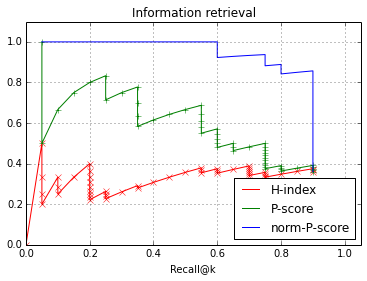

In [173]:
show_me('Information retrieval', 'ir-students', 2)

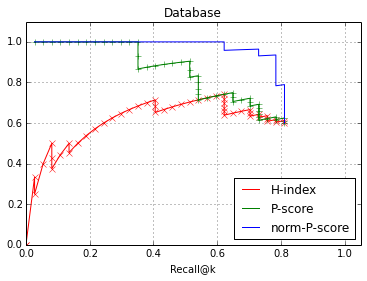

In [174]:
show_me('Database', 'db', 1)

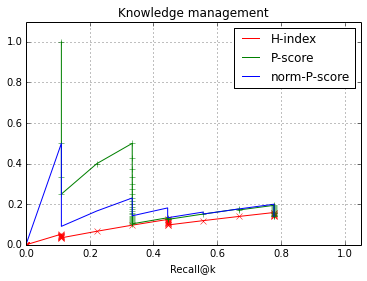

In [177]:
show_me('Knowledge management', 'km', 2)

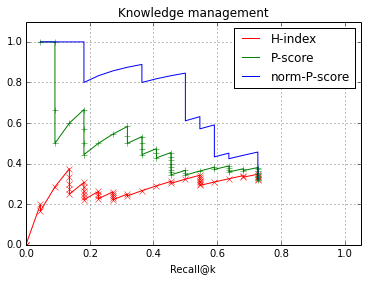

In [180]:
show_me('Knowledge management', 'km', 1)

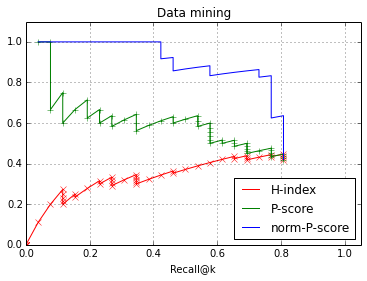

In [179]:
show_me('Data mining', 'dm', 2)

## Listing the differences

In [235]:
def list_diff(dirname, subarea, min_votes):
    sent = pd.read_csv('expert-subareas-classification/' + dirname + '/venues_subareas-' + str(min_votes) + '-votes.csv')
    rank = pd.DataFrame(pd.read_csv('input/march-7-50-venues/' + subarea + '.csv')['Vkey.2'])

    m = sent.merge(rank, left_on='Vkey', right_on='Vkey.2', how='outer')
    m = m.rename(columns={'Vkey': 'Sent', 'Vkey.2': 'Ranked'})
    m = m[m.isnull().any(axis=1)]    
    m = m.reset_index(drop=True)
    
    m.to_csv('expert-subareas-classification/differences/diff-' + dirname + '.csv')
        
    return m

ir = list_diff('ir-students', 'Information retrieval', 2)
db = list_diff('db', 'Database', 1)
dm = list_diff('dm', 'Data mining', 2)
km = list_diff('km', 'Knowledge management', 2)

In [236]:
dm

,Sent,Subareas,Ranked
0,journals/tist,['Artificial intelligence'],NaN
1,journals/sadm,"['Data mining', 'Data science']",NaN
2,conf/ssd,['Database'],NaN
3,conf/ilp,['Artificial intelligence'],NaN
4,conf/aistats,"['Artificial intelligence', 'Data mining', 'Ma...",NaN
5,conf/icwsm,"['Data science', 'World Wide Web']",NaN
6,conf/dawak,"['Data mining', 'Database']",NaN
7,journals/tois,['Data science'],NaN
8,journals/ida,"['Artificial intelligence', 'Data mining', 'Ma...",NaN
9,journals/jiis,"['Artificial intelligence', 'Knowledge managem...",NaN


## Plotting IV

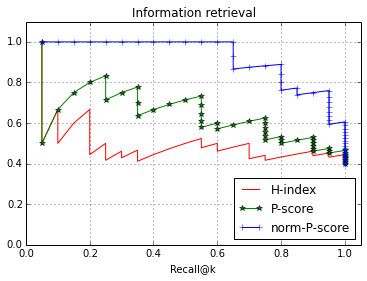

In [393]:
show_me('Information retrieval', 'ir-students', 2)

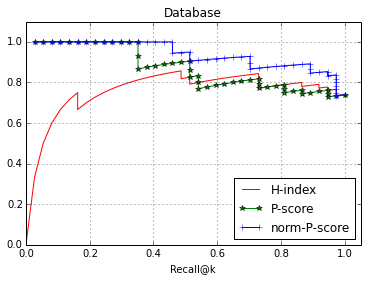

In [394]:
show_me('Database', 'db', 1)

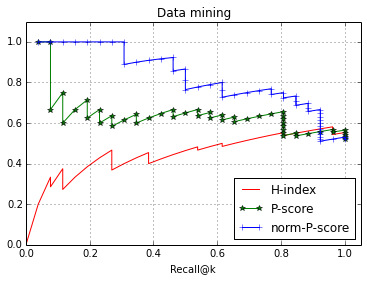

In [395]:
show_me('Data mining', 'dm', 2)

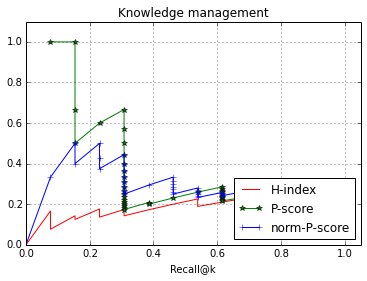

In [396]:
show_me('Knowledge management', 'km', 2)

## Tests After Defense 

In [4]:

import sys
sys.path.append('../../../../../ufmg-latin/pscore/rfs/')

import rfslib.datasets
dataset = rfslib.datasets.DBLPDataset('../../../../../pscore/datasets/',nauthors=1)
dataset.prepare()
v  = dataset.dfvenues.copy()

(1595771, 1) authors
(1, 1) authors loaded


In [31]:
names = ['conf/adcs','conf/ai','conf/airs','conf/algorithmica','conf/bibm','conf/bioinformatics','conf/ccs','conf/chi','conf/cidr',
         'conf/cikm','conf/clef','conf/coling','conf/comad','conf/cvpr','conf/dasfaa','conf/ecir','conf/edbt','conf/emnlp','conf/icdcs',
         'conf/icde','conf/icdm','conf/icdt','conf/icml','conf/ictir','conf/iiix','conf/ijcai','conf/ijcv','conf/inex','conf/infocom',
         'conf/interspeech','conf/ipps','conf/jcdl','conf/jmlr','conf/kdd','conf/la-web','conf/ntcir','conf/pakdd','conf/pkdd','conf/pldi',
         'conf/pods','conf/recsys','conf/riao','conf/sdm','conf/siamcomp','conf/siggraph','conf/sigir','conf/sigkdd','conf/sigmod','conf/sigops',
         'conf/soda','conf/sosp','conf/spire','conf/ssd','conf/ssdbm','conf/stoc','conf/tcom','conf/tcvg','conf/tissec','conf/tochi','conf/tods',
         'conf/tois','conf/ton','conf/toplas','conf/tpds','conf/trec','conf/vldb','conf/webdb','conf/ws','conf/wsdm','conf/www','journals/ai',
         'journals/algorithmica','journals/bibm','journals/bioinformatics','journals/ccs','journals/chi','journals/coling','journals/cvpr',
         'journals/datamine','journals/debu','journals/dpd','journals/emnlp','journals/icdcs','journals/icml','journals/ijcai','journals/ijcv',
         'journals/infocom','journals/interspeech','journals/ipps','journals/ir','journals/jmlr','journals/kais','journals/kdd','journals/pldi',
         'journals/pvldb','journals/sadm','journals/siamcomp','journals/siggraph','journals/sigir','journals/sigkdd','journals/sigmod',
         'journals/sigops','journals/soda','journals/sosp','journals/stoc','journals/tcom','journals/tcvg','journals/tissec','journals/tist',
         'journals/tkdd','journals/tkde','journals/tochi','journals/tods','journals/tois','journals/ton','journals/toplas','journals/tpds',
         'journals/tweb','journals/vldb','journals/ws','journals/www']
x = v[v.Vkey.isin(names)].set_index('Vkey')['Name']
x.index = x.index.str.upper()
x.to_csv('output/diss_all_venues.csv')
x

Vkey
JOURNALS/TCOM                            IEEE Transactions on Communications
CONF/INFOCOM                                        INFOCOM (IEEE) (INFOCOM)
CONF/KDD                           Knowledge Discovery and Data Mining (KDD)
JOURNALS/TON                       IEEE/ACM Transactions on Networking (TON)
JOURNALS/TPDS              IEEE Transactions on Parallel and Distributed ...
CONF/NTCIR                 NII Testbeds and Community for Information Acc...
JOURNALS/PVLDB                             Proceedings of the VLDB Endowment
CONF/IPPS                  International Parallel (and Distributed) Proce...
CONF/EMNLP                 Conference on Empirical Methods in Natural Lan...
CONF/SIGMOD                        Conference on Management of Data (SIGMOD)
JOURNALS/BIOINFORMATICS                                       Bioinformatics
CONF/CIKM                  Conference on Information and Knowledge Manage...
CONF/CVPR                     Computer Vision and Pattern Recognition (

In [45]:
v[v.Vkey.str.contains('tissec')].Name.tolist()

['ACM Transactions on Privacy and Security (TOPS) / ACM Transactions on Information and System Security (TISSEC)']